# 2. 전복 데이터를 가지고 머신러닝 회귀 수행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../abalone.csv", index_col=None)
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
X=df.drop('Rings',axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [4]:
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [5]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

from sklearn.preprocessing import StandardScaler

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균 제곱 오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균 제곱 오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균 제곱 오차', mse(ly_preds, y_test))

평균 제곱 오차 4.501829496419424
평균 제곱 오차 4.501829496419424
평균 제곱 오차 4.5018294964194245


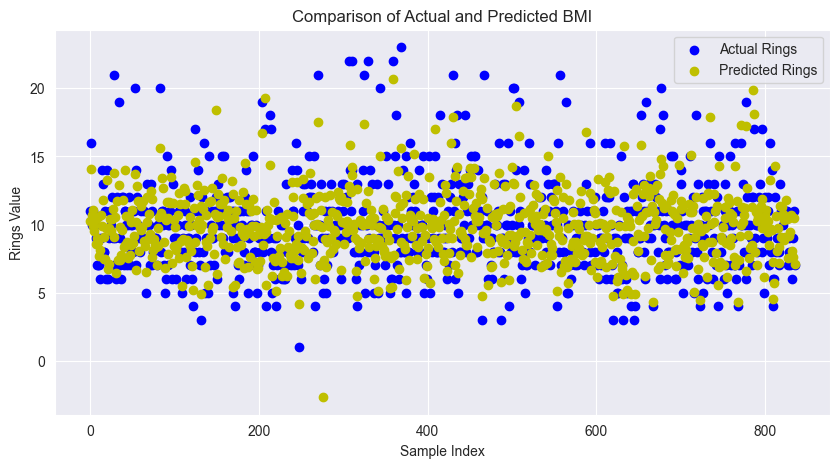

In [8]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual Rings', color='blue')
plt.scatter(range(len(ly_preds)), ly_preds, c='y', label='Predicted Rings')

# 그래프 표시
plt.title('Comparison of Actual and Predicted BMI')
plt.xlabel('Sample Index')
plt.ylabel('Rings Value')
plt.legend()
plt.show()

In [9]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균 제곱 오차', mean_squared_error(dy_preds, y_test))

평균 제곱 오차 7.9246411483253585


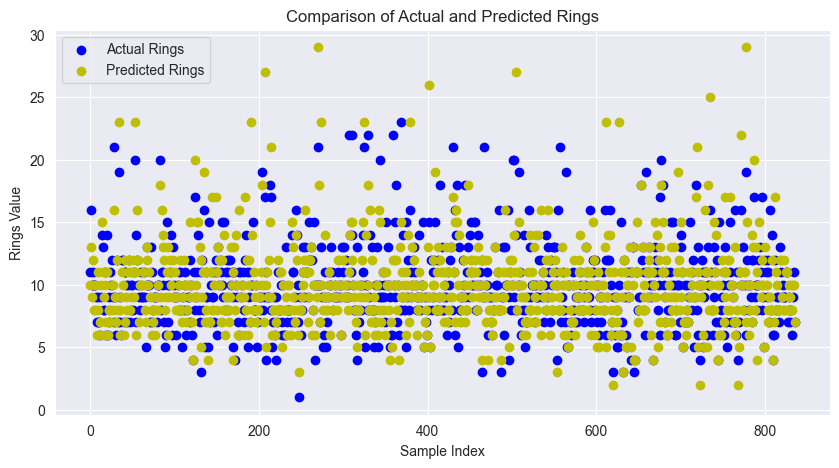

In [10]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual Rings', color='blue')
plt.scatter(range(len(dy_preds)), dy_preds, c='y', label='Predicted Rings')

# 그래프 표시
plt.title('Comparison of Actual and Predicted Rings')
plt.xlabel('Sample Index')
plt.ylabel('Rings Value')
plt.legend()
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균 제곱 오차', mean_squared_error(ry_preds, y_test))

평균 제곱 오차 3.3215830143540668


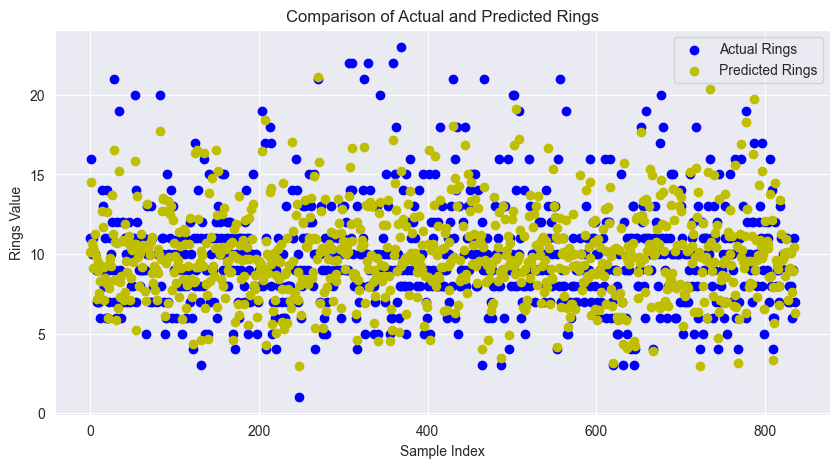

In [12]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual Rings', color='blue')
plt.scatter(range(len(ry_preds)), ry_preds, c='y', label='Predicted Rings')

# 그래프 표시
plt.title('Comparison of Actual and Predicted Rings')
plt.xlabel('Sample Index')
plt.ylabel('Rings Value')
plt.legend()
plt.show()

In [13]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

svy_preds = model.predict(X_test)
print('평균 제곱 오차', mean_squared_error(svy_preds, y_test))

평균 제곱 오차 6.171443463152105


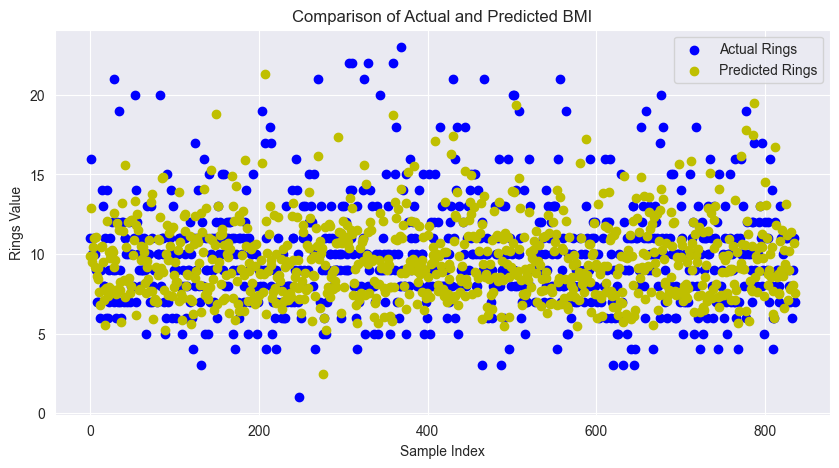

In [14]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual Rings', color='blue')
plt.scatter(range(len(svy_preds)), svy_preds, c='y', label='Predicted Rings')

# 그래프 표시
plt.title('Comparison of Actual and Predicted BMI')
plt.xlabel('Sample Index')
plt.ylabel('Rings Value')
plt.legend()
plt.show()    